In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df=pd.read_table('/household_power_consumption.txt',sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
df.replace('?',np.nan, inplace=True)

In [7]:
df.isnull().sum()

Date                        0
Time                        0
Global_active_power      3772
Global_reactive_power    3772
Voltage                  3773
Global_intensity         3773
Sub_metering_1           3773
Sub_metering_2           3773
Sub_metering_3           3773
dtype: int64

In [9]:
df.fillna(method= 'ffill',inplace=True)
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
df['globalintensity']=df['Global_intensity']
df['globalactivepower']=df['Global_active_power']
df.drop(['Global_intensity'],axis=1,inplace=True)
df.drop(['Global_active_power'],axis=1,inplace=True)
df.drop(['Date'],axis=1,inplace=True)
df.drop(['Time'],axis=1,inplace=True)
df.head()

,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,globalintensity,globalactivepower
0,0.418,234.840,0.000,1.000,17.0,18.400,4.216
1,0.436,233.630,0.000,1.000,16.0,23.000,5.360
2,0.498,233.290,0.000,2.000,17.0,23.000,5.374
3,0.502,233.740,0.000,1.000,17.0,23.000,5.388
4,0.528,235.680,0.000,1.000,17.0,15.800,3.666


In [13]:
df.dtypes

Global_reactive_power     object
Voltage                   object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
globalintensity           object
globalactivepower         object
dtype: object

In [14]:
df = df.astype(float)

In [42]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,6].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


In [35]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
regressor.score(X_test, Y_test)

0.9984404577479791

In [23]:
#building optimal model using bwd elimination
import statsmodels.api as sm 
df.tail()


,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,globalintensity,globalactivepower
262416,0.186,240.78,0.0,1.0,0.0,4.0,0.946
262417,0.186,240.59,0.0,2.0,0.0,4.0,0.944
262418,0.184,240.17,0.0,1.0,0.0,4.0,0.942
262419,0.182,239.97,0.0,2.0,0.0,4.0,0.940
262420,0.180,239.97,0.0,2.0,0.0,4.0,0.942


In [31]:
df.head()

,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,globalintensity,globalactivepower
0,0.418,234.84,0.0,1.0,17.0,18.4,4.216
1,0.436,233.63,0.0,1.0,16.0,23.0,5.360
2,0.498,233.29,0.0,2.0,17.0,23.0,5.374
3,0.502,233.74,0.0,1.0,17.0,23.0,5.388
4,0.528,235.68,0.0,1.0,17.0,15.8,3.666


In [40]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, Y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, Y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_pred), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, Y_pred), 2))

Mean absolute error = 0.03
Mean squared error = 0.0
Median absolute error = 0.02
Explain variance score = 1.0
R2 score = 1.0


In [43]:
X

array([[4.1800e-01, 2.3484e+02, 0.0000e+00, 1.0000e+00, 1.7000e+01,
        1.8400e+01],
       [4.3600e-01, 2.3363e+02, 0.0000e+00, 1.0000e+00, 1.6000e+01,
        2.3000e+01],
       [4.9800e-01, 2.3329e+02, 0.0000e+00, 2.0000e+00, 1.7000e+01,
        2.3000e+01],
       ...,
       [1.8400e-01, 2.4017e+02, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        4.0000e+00],
       [1.8200e-01, 2.3997e+02, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        4.0000e+00],
       [1.8000e-01, 2.3997e+02, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        4.0000e+00]])

In [44]:
#building optimal model using bwd elimination
import statsmodels.api as sm 
df.tail()

,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,globalintensity,globalactivepower
262416,0.186,240.78,0.0,1.0,0.0,4.0,0.946
262417,0.186,240.59,0.0,2.0,0.0,4.0,0.944
262418,0.184,240.17,0.0,1.0,0.0,4.0,0.942
262419,0.182,239.97,0.0,2.0,0.0,4.0,0.940
262420,0.180,239.97,0.0,2.0,0.0,4.0,0.942


In [45]:
X=np.append(arr=np.ones((262421,1)).astype(int),values=X,axis=1)
X

array([[1.0000e+00, 4.1800e-01, 2.3484e+02, ..., 1.0000e+00, 1.7000e+01,
        1.8400e+01],
       [1.0000e+00, 4.3600e-01, 2.3363e+02, ..., 1.0000e+00, 1.6000e+01,
        2.3000e+01],
       [1.0000e+00, 4.9800e-01, 2.3329e+02, ..., 2.0000e+00, 1.7000e+01,
        2.3000e+01],
       ...,
       [1.0000e+00, 1.8400e-01, 2.4017e+02, ..., 1.0000e+00, 0.0000e+00,
        4.0000e+00],
       [1.0000e+00, 1.8200e-01, 2.3997e+02, ..., 2.0000e+00, 0.0000e+00,
        4.0000e+00],
       [1.0000e+00, 1.8000e-01, 2.3997e+02, ..., 2.0000e+00, 0.0000e+00,
        4.0000e+00]])

In [52]:
X_opt=X[:,[0,1,2,3,4,5,6]]#total number of x
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary() #remove the parameters with P>0.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.856e+07
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:55:42   Log-Likelihood:             4.2497e+05
No. Observations:              262421   AIC:                        -8.499e+05
Df Residuals:                  262414   BIC:                        -8.499e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0226      0.006   -158.245      0.000      -1.035      -1.010
x1            -0.1513      0.001   -172.881      0.000      -0.153      -0.150
x2             0.0043   2.68e-05    158.382      0.000       0.004       0.004
x3            -0.0007   1.66e-05    -40.743      0.000      -0.001      -0.001
x4            -0.0007   1.63e-05    -42.600      0.000      -0.001      -0.001
x5             0.0019    1.5e-05    129.493      0.000       0.002       0.002
x6             0.2374   3.13e-05   7591.508      0.000       0.237       0.237
==============================================================================
Omnibus:                   194485.357   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6330997.520
Skew:                          -3.239   Prob(JB):                         0.00
Kurtosis:                      26.174   Cond. No.                     1.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

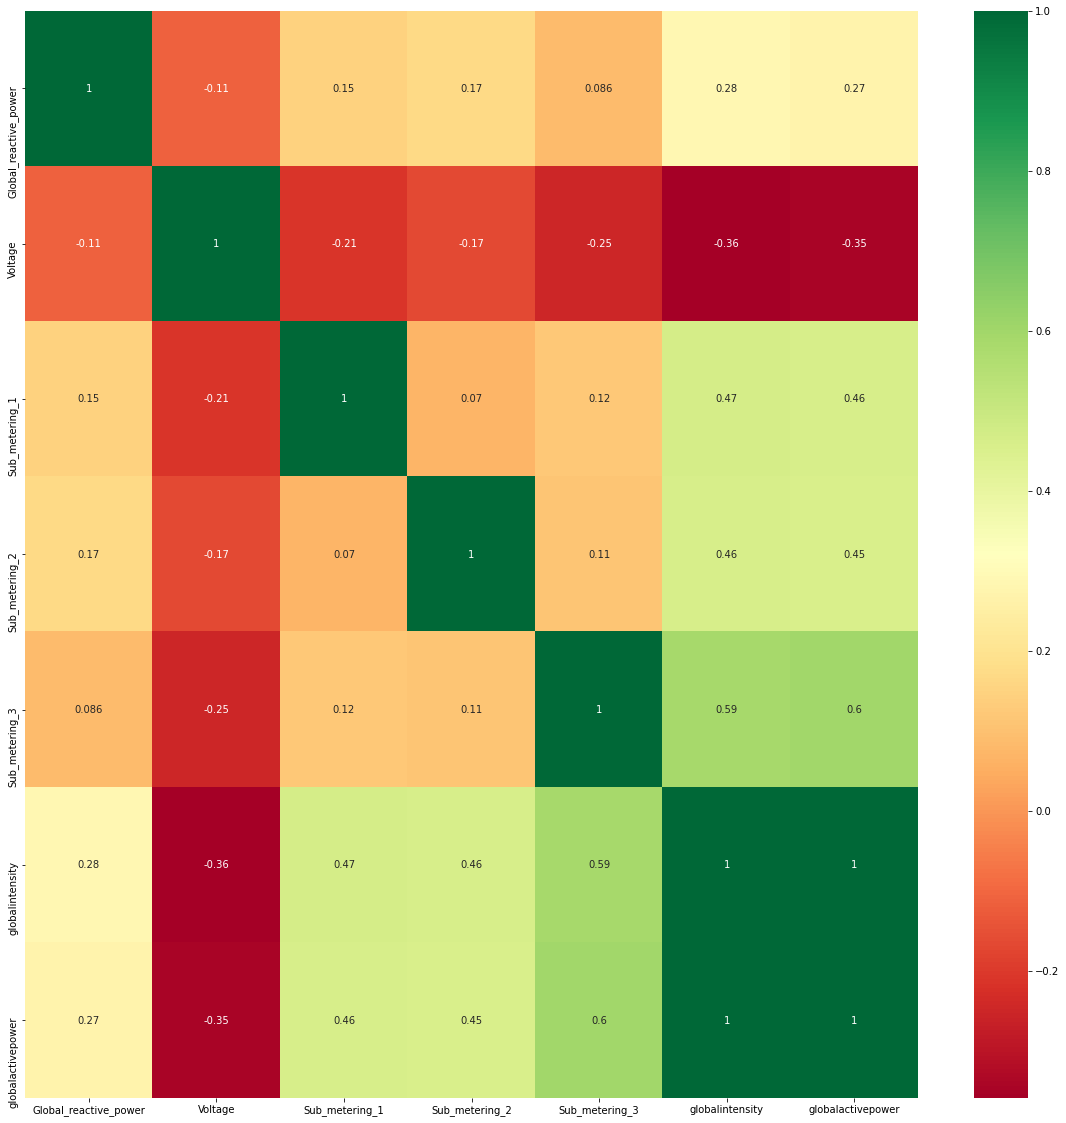

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

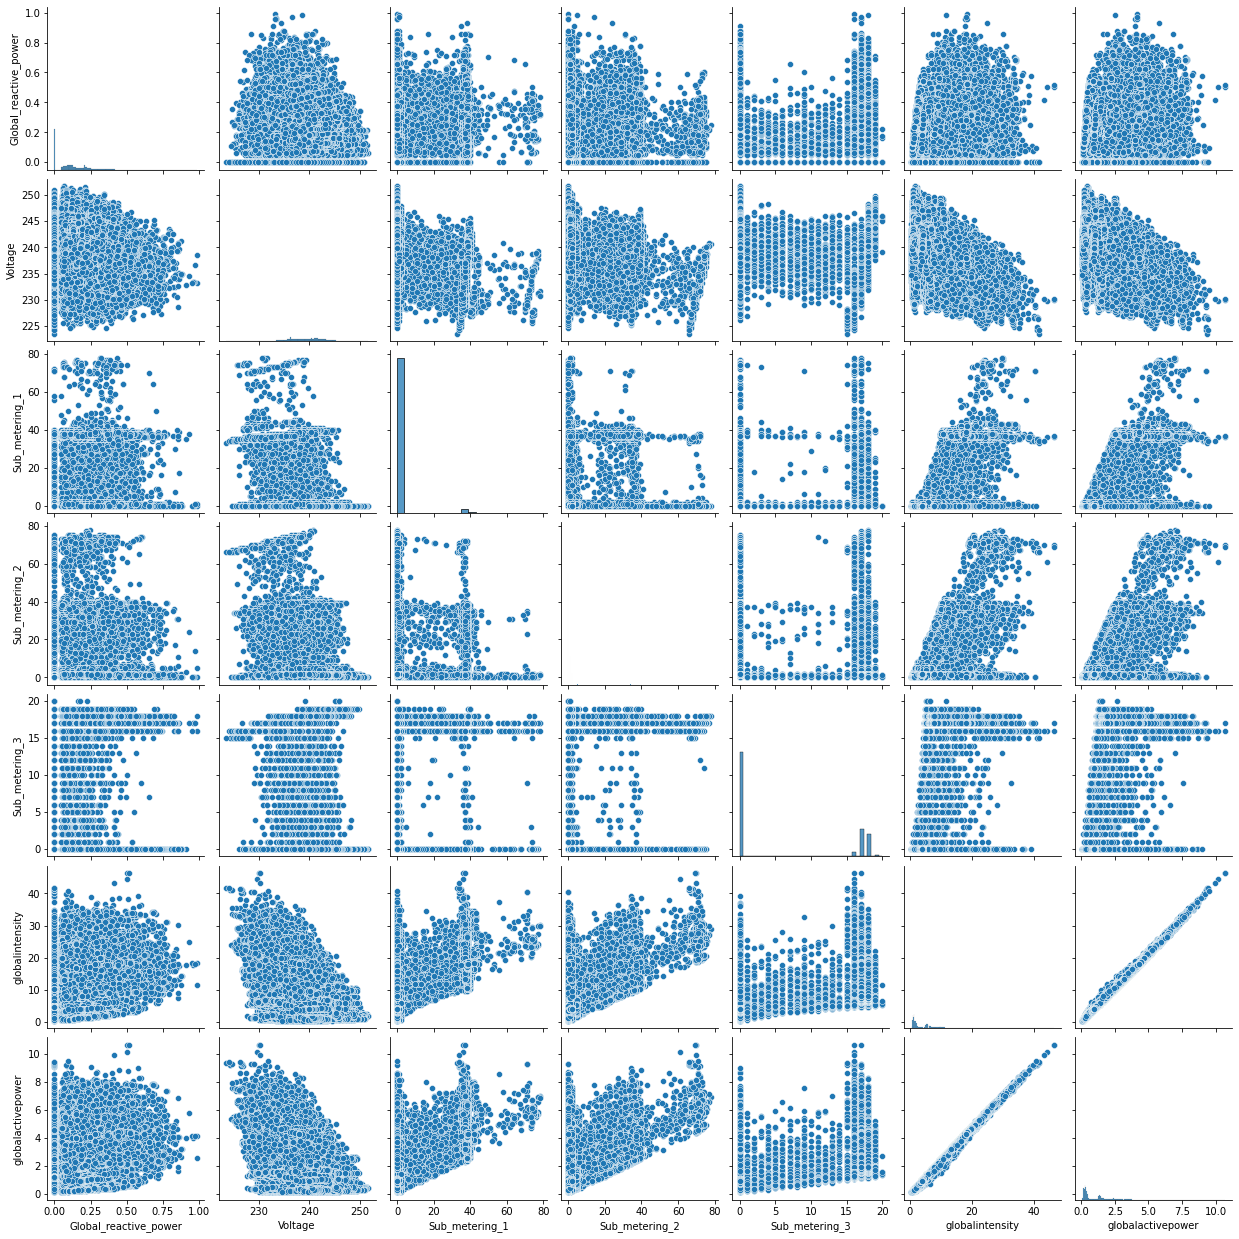

In [55]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


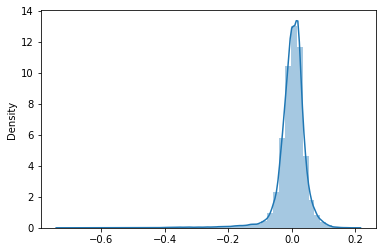

In [56]:
sns.distplot(Y_test-Y_pred)

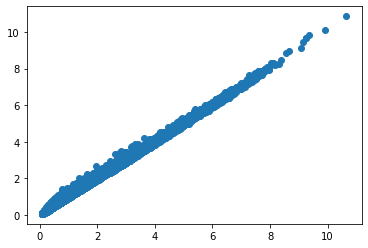

In [58]:
plt.scatter(Y_test,Y_pred)

In [63]:
from sklearn.svm import SVR
svrregressor= SVR(kernel='linear') #can be any kernel based on datapoints
svrregressor.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [64]:
Y_pred=svrregressor.predict(X_test)
svrregressor.score(X_test, Y_test)

0.9974634884532338

In [65]:
#Y_pred=sc_Y.inverse_transform(svrregressor.predict(sc_X.transform(np.array([[#values,value]])))) #for prediction, we need to scale input values too